<a href="https://colab.research.google.com/github/Tridude5/ClimateRiskCoach/blob/main/Climate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MScFE Capstone Project**
## Student Group: **11191**

### Members:
1. **Miklos Lammel**
2. **Jack Slavinskas**
3. **Cathal de Lacy**

## **Install and then import python packages**

### Installing required libraries

Note:

!pip runs a shell command. Depending on PATHs, it can sometimes install packages into a different Python environment than the one your notebook kernel uses.

%pip is safer to use it is an IPython magic. It runs pip against the exact Python executable of the current kernel (equivalent to python -m pip …) and then updates the notebook's sys.path so the newly installed packages are importable immediately.

In [1]:
# installing the required libraries ()
%pip install fredapi

### Helper functions

#### Do NOT get a newer IPython version for autoreload - left here for reference what did NOT work.

In [2]:
# Get current IPython version in 2 different ways
import IPython
print(IPython.__version__)

from importlib.metadata import version
print(version("ipython"))


7.34.0
7.34.0


In [3]:
# shows the latest and all available versions
!pip index versions ipython


ipython (9.7.0)
Available versions: 9.7.0, 9.6.0, 9.5.0, 9.4.0, 9.3.0, 9.2.0, 9.1.0, 9.0.2, 9.0.1, 9.0.0, 8.37.0, 8.36.0, 8.35.0, 8.34.0, 8.33.0, 8.32.0, 8.31.0, 8.30.0, 8.29.0, 8.28.0, 8.27.0, 8.26.0, 8.25.0, 8.24.0, 8.23.0, 8.22.2, 8.22.1, 8.21.0, 8.20.0, 8.18.1, 8.18.0, 8.17.2, 8.17.1, 8.16.1, 8.15.0, 8.14.0, 8.13.2, 8.13.1, 8.12.3, 8.12.2, 8.12.1, 8.12.0, 8.11.0, 8.10.0, 8.9.0, 8.8.0, 8.7.0, 8.6.0, 8.5.0, 8.4.0, 8.3.0, 8.2.0, 8.1.1, 8.1.0, 8.0.1, 8.0.0, 7.34.0, 7.33.0, 7.32.0, 7.31.1, 7.31.0, 7.30.1, 7.29.0, 7.28.0, 7.27.0, 7.26.0, 7.25.0, 7.24.1, 7.24.0, 7.23.1, 7.23.0, 7.22.0, 7.21.0, 7.20.0, 7.19.0, 7.18.1, 7.18.0, 7.17.0, 7.16.3, 7.16.2, 7.16.1, 7.16.0, 7.15.0, 7.14.0, 7.13.0, 7.12.0, 7.11.1, 7.11.0, 7.10.2, 7.10.1, 7.10.0, 7.9.0, 7.8.0, 7.7.0, 7.6.1, 7.6.0, 7.5.0, 7.4.0, 7.3.0, 7.2.0, 7.1.1, 7.0.1, 7.0.0, 6.5.0, 6.4.0, 6.3.1, 6.3.0, 6.2.1, 6.2.0, 6.1.0, 6.0.0, 5.10.0, 5.9.0, 5.8.0, 5.7.0, 5.6.0, 5.5.0, 5.4.1, 5.4.0, 5.3.0, 5.2.2, 5.2.1, 5.2.0, 5.1.0, 5.0.0, 4.2.1, 4.2.0, 4.1.2

In [4]:
# pip index is experimental and might later be removed so double check
import json, urllib.request
data = json.load(urllib.request.urlopen("https://pypi.org/pypi/ipython/json"))
print("Latest:", data["info"]["version"])


Latest: 9.7.0


In [ ]:
# Updating ipython from the current 7.34.0 version leeds to all sorts of incompatibility warnings
# We really shouldn't do it, because Google Colab relies on this version
# So no autoreload feature will be available, because that is only available from ipython version 8.something.

# %pip install "ipython==9.6.0"

#### Get Python version and dependencies

In [5]:
# Get Python version
!python --version

Python 3.12.12


In [6]:
# Get all the dependencies
!pip freeze > requirements.txt

In [ ]:
# !cat requirements.txt

#### Helper to jump to content folder

In [7]:
# Jump to the content folder on the left file explorer plane
from google.colab import files
files.view("/content")

<IPython.core.display.Javascript object>

### **Import needed libraries**

In [10]:
# importing the required libraries
import io
import json
import requests
from datetime import date

import logging
import sys
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

from fredapi import Fred
import yfinance as yf

from scipy.signal import savgol_filter
from scipy.interpolate import PchipInterpolator, Akima1DInterpolator, UnivariateSpline
from statsmodels.nonparametric.smoothers_lowess import lowess

import warnings
warnings.filterwarnings('ignore')

## Setup logging

In [11]:
logger = logging.getLogger("utils.download_data")
logger.setLevel(logging.INFO)

if not logger.handlers:
    handler = logging.StreamHandler(sys.stdout)  # force logs to cell output
    formatter = logging.Formatter("%(asctime)s | %(levelname)s | %(message)s")
    handler.setFormatter(formatter)
    logger.addHandler(handler)

# avoid double-logging if root has handlers
logger.propagate = False

## **Set up this Colab local machine**

To be able to import from other
- Jupyter Notebooks (ipynb) and
- Python files

which are located in the GitHub

### Set up GitHub repo

In [9]:
# --- Repo setup (edit these 2 lines) ---
REPO_URL = "https://github.com/Tridude5/ClimateRiskCoach.git"
REPO_DIR = "/content/climate"

# --- Clone or update the repo into the Colab VM ---
import os, sys, pathlib, subprocess

if not os.path.exists(REPO_DIR):
    !git clone $REPO_URL $REPO_DIR
else:
    # If already present (e.g., from a previous cell execution), pull latest
    %cd $REPO_DIR
    !git pull
    %cd /content

%cd $REPO_DIR

# --- Make the repo importable ---
sys.path.append(str(pathlib.Path.cwd()))

# --- Enable importing .ipynb files directly ---
!pip -q install import-ipynb
import import_ipynb


Cloning into '/content/climate'...
remote: Enumerating objects: 164, done.
remote: Counting objects: 100% (164/164), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 164 (delta 76), reused 50 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (164/164), 1.53 MiB | 8.17 MiB/s, done.
Resolving deltas: 100% (76/76), done.
/content/climate
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.6 MB/s eta 0:00:00


In [12]:
%cd /content/climate
import sys; sys.path.insert(0, '/content/climate')  # once per session
from utils.download_data import download_silso_sunspot_daily

/content/climate


In [13]:
DATA_DIR = Path("data_sources")
RAW_DATA_DIR = DATA_DIR / "raw"
RAW_DATA_DIR.mkdir(parents=True, exist_ok=True)

In [14]:
# Get SILSO and save it csv
logger.info("Starting SILSO sunspot daily data download...")
df_silso_daily = download_silso_sunspot_daily()

silso_raw_path = RAW_DATA_DIR / "silso_sunspot_daily_raw.csv"
df_silso_daily.to_csv(silso_raw_path, index=True)

logger.info(f"SILSO daily sunspot data download complete. Saved to {silso_raw_path}")
logger.info(f"SILSO daily dataframe head:\n{df_silso_daily.head()}\n\n")

2025-11-27 01:09:56,563 | INFO | Starting SILSO sunspot daily data download...
2025-11-27 01:09:56,566 | INFO | Downloading SILSO daily sunspot data from https://www.sidc.be/SILSO/DATA/SN_d_tot_V2.0.csv
2025-11-27 01:09:58,488 | INFO | SILSO sunspot data loaded: 75910 rows
2025-11-27 01:09:58,644 | INFO | SILSO daily sunspot data download complete. Saved to data_sources/raw/silso_sunspot_daily_raw.csv
2025-11-27 01:09:58,652 | INFO | SILSO daily dataframe head:
            sunspot_number
date                      
1818-01-01            -1.0
1818-01-02            -1.0
1818-01-03            -1.0
1818-01-04            -1.0
1818-01-05            -1.0




In [ ]:
%cd /content/climate
import sys; sys.path.insert(0, '/content/climate')  # once per session
from utils import get_data

# This is needed to reload the external files when they change
import importlib
importlib.reload(get_data)

/content/climate


<module 'utils.get_data' from '/content/climate/utils/get_data.py'>

In [ ]:
get_data.print_something("this text to print")

Util print: this text to print


## **Data import**
Import, structure and graph the climate related indicator variable


- CPU Index (Climate Policy Uncertainty): Monthly data, available from the policyuncertainty.com website. Measures unpredictability in government climate-related actions and regulation.
- TRI (Transition Risk Index): Daily index, tracks risks from regulatory change, technology shifts, and market transformation related to moving toward a low-carbon economy. Data available from policyuncertainty.com and referenced datasets.
- PRI (Physical Risk Index): Daily index, measures vulnerability to extreme weather events and long-term physical changes (rising temperature, sea level, droughts, hurricanes, etc.). Also found on policyuncertainty.com and climate risk data repositories such as Guo et al. 2024.
- CCI (Climate Concern Index): Measures public sentiment, concern, and perceived impact of climate change using web search and engagement data. US (and Italy) only monthly data.

Impractical to use:
- EPU Index (Economic Policy Uncertainty): Monthly data, standard financial uncertainty measure, available from policyuncertainty.com. The world-aggregate values are monthly only and are not strictly related to climate

Paid source - no access:
- ESG Index (Environmental, Social, Governance): Monthly index data, can be sourced from providers like Indxx.com which is a paid, proprietary solution. As a proxy we can use ETFs. It captures corporate environmental and social risk management and sustainability practices.



Proxy for ESG Index:

- The ESG indices are usually proprietary and paid. Indxx.com has a nice set of ESG indices which was used by Maria Ghani in her work "Forecasting Climate-Sensitive Industries' Volatility"
- The alternative proxies aren't "ESG index series" per se, but ETFs whose performance roughly tracks ESG/ESG-screened equity portfolios:

Possible ESG indices / proxies accessible via yfinance:


- ESGV — Vanguard ESG U.S. Stock ETF (US)
Yahoo Finance

- ESGU — iShares ESG Aware MSCI USA ETF
Yahoo Finance

- ESGD — iShares ESG Aware MSCI EAFE ETF
Yahoo Finance

- SUSA — iShares ESG Optimized MSCI USA ETF
Yahoo Finance

- USXF — iShares ESG Advanced MSCI USA ETF
Yahoo Finance

- EEWD.L — iShares MSCI World ESG Enhanced CTB UCITS ETF (in London listing)
Yahoo Finance

These ETFs can give a time series of returns or price levels that approximate ESG-indexed performance in their respective universes.

- Additionally, via yfinance, tickers sometimes have a .sustainability attribute containing ESG/risk scores (for individual companies)

### Helper function to check gaps in dataseries

In [ ]:
def check_gaps(df):
    # Identify all gaps > 1 day
    gaps = df.index.to_series().diff()

    # Count by size
    print("\n\nGap size counts (days):")
    print(gaps.dt.days.value_counts().sort_index())

    # Which of the >1 day gaps are normal Fri->Mon weekend jumps?
    is_weekend_jump = (
        (df.index.to_series().shift(1).dt.weekday == 4) &  # Friday
        (df.index.to_series().dt.weekday == 0) &           # Monday
        (gaps.dt.days == 3)
    )

    print(f"\nWeekend (Fri->Mon) gaps: {is_weekend_jump.sum()}")
    unusual = (gaps.dt.days > 1) & (~is_weekend_jump)
    print(f"Unusual gaps (>1 day but not Fri->Mon): {unusual.sum()}")

    # Optional: list unusual gaps (likely holidays if any)
    if unusual.any():
        print("⚠️ Unusual gaps detected:")
        print(pd.DataFrame({
            "prev_date": df.index[unusual.shift(-1, fill_value=False)],
            "next_date": df.index[unusual],
            "gap_days": gaps[unusual].dt.days.values
        }).head(10))

    else:
        print("✅ Only weekend gaps found.")
    print("\n\n\n")


## Get NASA GISTEMP - Global Temperature Anomaly

Not possible to download directly from the API due to network error.

Manually downloaded.

In [ ]:
# Path to your uploaded file
file_path = "/content/climate/data_sources/raw/GLB.Ts+dSST.csv"

# Find the header row dynamically
with open(file_path) as f:
    for i, line in enumerate(f):
        if line.strip().startswith("Year"):
            header_row = i
            break

print("Header row found at line:", header_row)

# Load data from that line onward
df = pd.read_csv(file_path, skiprows=header_row)

# Show first few rows
df.head()


Header row found at line: 1


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.19,-0.25,-0.09,-0.16,-0.10,-0.21,-0.18,-0.10,-.15,-.24,-.22,-.18,-.17,***,***,-0.12,-0.16,-.20
1,1881,-0.20,-0.14,0.03,0.05,0.06,-0.19,0.00,-0.03,-.15,-.22,-.19,-.07,-.09,-.10,-.17,0.05,-0.07,-.18
2,1882,0.16,0.14,0.04,-0.17,-0.14,-0.23,-0.16,-0.07,-.14,-.24,-.17,-.36,-.11,-.09,.08,-0.09,-0.15,-.18
3,1883,-0.29,-0.36,-0.12,-0.18,-0.17,-0.07,-0.06,-0.13,-.21,-.11,-.23,-.11,-.17,-.19,-.34,-0.15,-0.09,-.18
4,1884,-0.13,-0.07,-0.35,-0.40,-0.33,-0.35,-0.30,-0.27,-.27,-.25,-.33,-.31,-.28,-.26,-.10,-0.36,-0.31,-.28


In [ ]:
# Keep only the monthly columns
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
df_monthly = df.melt(
    id_vars="Year",
    value_vars=months,
    var_name="Month",
    value_name="Anomaly"
)

# Map month names to month numbers
month_map = {m: i for i, m in enumerate(months, start=1)}
df_monthly["Month_num"] = df_monthly["Month"].map(month_map)

# Create a datetime index (set to first day of month)
df_monthly["Date"] = pd.to_datetime(
    dict(year=df_monthly["Year"], month=df_monthly["Month_num"], day=1)
)

# Sort by date and set as index
df_ts = df_monthly[["Date", "Anomaly"]].sort_values("Date").set_index("Date")

# Display the result
print(df_ts.head(15))
print(df_ts.tail(15))

           Anomaly
Date              
1880-01-01   -0.19
1880-02-01   -0.25
1880-03-01   -0.09
1880-04-01   -0.16
1880-05-01    -0.1
1880-06-01   -0.21
1880-07-01   -0.18
1880-08-01    -0.1
1880-09-01    -.15
1880-10-01    -.24
1880-11-01    -.22
1880-12-01    -.18
1881-01-01    -0.2
1881-02-01   -0.14
1881-03-01    0.03
           Anomaly
Date              
2024-10-01    1.34
2024-11-01    1.29
2024-12-01    1.27
2025-01-01    1.37
2025-02-01    1.25
2025-03-01    1.36
2025-04-01    1.23
2025-05-01    1.07
2025-06-01    1.05
2025-07-01    1.01
2025-08-01    1.14
2025-09-01     ***
2025-10-01     ***
2025-11-01     ***
2025-12-01     ***


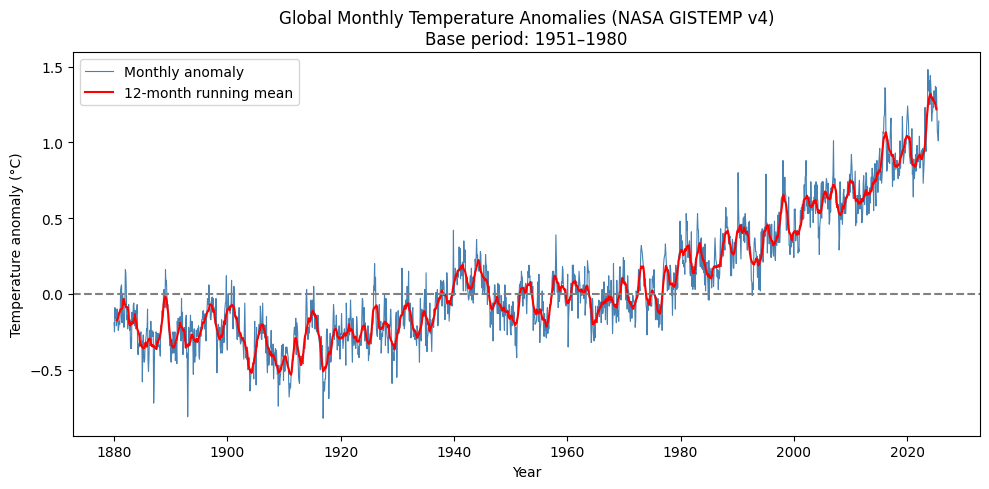

In [ ]:
# Ensure numeric anomalies, replacing "***" with NaN
df_ts["Anomaly"] = pd.to_numeric(df_ts["Anomaly"], errors="coerce")

# Optional: drop missing values for plotting
df_ts_clean = df_ts.dropna(subset=["Anomaly"])

# Plot
plt.figure(figsize=(10,5))
plt.plot(df_ts_clean.index, df_ts_clean["Anomaly"], color="steelblue", linewidth=0.8, label="Monthly anomaly")
plt.plot(df_ts_clean["Anomaly"].rolling(12, center=True).mean(), color="red", label="12-month running mean")
plt.axhline(0, color="gray", linestyle="--")
plt.title("Global Monthly Temperature Anomalies (NASA GISTEMP v4)\nBase period: 1951–1980")
plt.xlabel("Year")
plt.ylabel("Temperature anomaly (°C)")
plt.legend()
plt.tight_layout()
plt.show()


## Solar activity

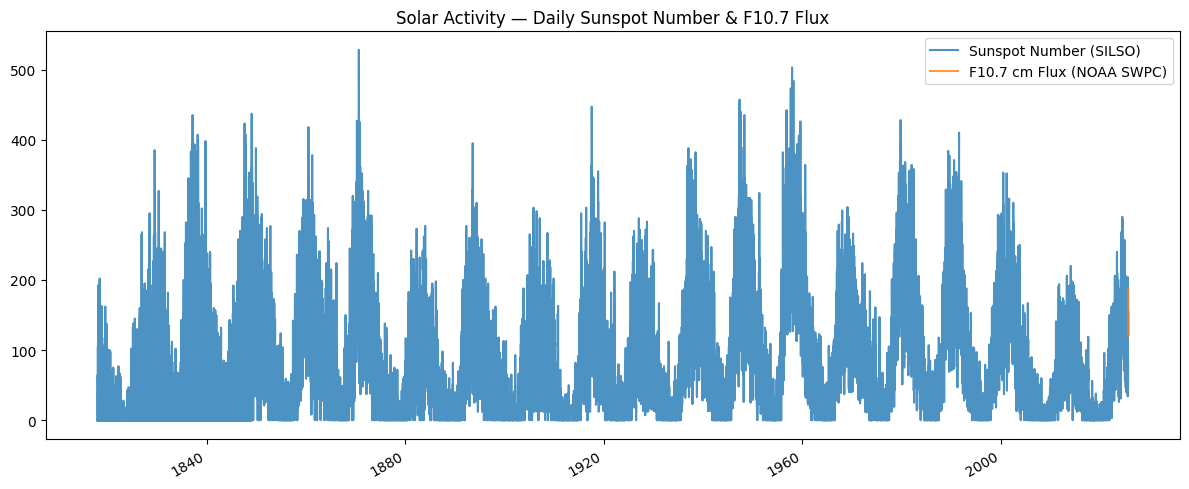

Saved: solar_activity.csv


In [ ]:
# --- SILSO daily sunspot number (semicolon-separated) ---
silso_url = "https://www.sidc.be/SILSO/DATA/SN_d_tot_V2.0.csv"
silso = pd.read_csv(
    silso_url,
    sep=";",                      # <-- the key fix
    header=None,
    comment="#",
    names=["year","month","day","decimal_date","sunspot_number","std","n_obs","definitive"],
    usecols=["year","month","day","sunspot_number"],   # keep it lean
)
silso["date"] = pd.to_datetime(silso[["year","month","day"]])
silso = silso.set_index("date")[["sunspot_number"]].astype(float)

# --- NOAA SWPC F10.7 cm radio flux (last 30 days) ---
f107_url = "https://services.swpc.noaa.gov/products/10cm-flux-30-day.json"
arr = requests.get(f107_url, timeout=30).json()
f107 = pd.DataFrame(arr[1:], columns=arr[0])
f107["time_tag"] = pd.to_datetime(f107["time_tag"])
f107 = f107.set_index("time_tag")[["flux"]].rename(columns={"flux":"f107_flux"})
f107["f107_flux"] = pd.to_numeric(f107["f107_flux"], errors="coerce")

# --- Merge + plot ---
df = silso.join(f107, how="outer")

plt.figure(figsize=(12,5))
df["sunspot_number"].plot(label="Sunspot Number (SILSO)", alpha=0.8)
df["f107_flux"].plot(label="F10.7 cm Flux (NOAA SWPC)", alpha=0.8)
plt.legend()
plt.title("Solar Activity — Daily Sunspot Number & F10.7 Flux")
plt.xlabel("")
plt.tight_layout()
plt.show()

# Optional: save
df.to_csv("solar_activity.csv")
print("Saved: solar_activity.csv")


In [ ]:
print(silso.head())

            sunspot_number
date                      
1818-01-01            -1.0
1818-01-02            -1.0
1818-01-03            -1.0
1818-01-04            -1.0
1818-01-05            -1.0


## Get CCI US - Climate Concern Index for US

In [ ]:
url = "https://www.dropbox.com/scl/fi/jry5qvuqwvhnf855g2c6g/CCI.xlsx?rlkey=gnfe8dhxmvakigyau7y96ftvh&e=1&st=vbt29qrv&dl=0"
direct = url.replace("dl=0", "dl=1")  # force direct download
df = pd.read_excel(direct)            # load into a DataFrame

# Build a proper datetime index from 'year' and 'month' (column B and C)
df["date"] = pd.to_datetime(df["year"].astype(str) + "-" + df["month"].astype(str).str.zfill(2))

# Set this as the index
df = df.set_index("date")

# Keep only the U.S. CCI column
df_cci_us = df[["US_CCI_Raw"]].copy()

# Optional: sort by date just to be sure
df_cci_us = df_cci_us.sort_index()

print(df_cci_us.head())
print(df_cci_us.tail(10))


            US_CCI_Raw
date                  
2004-01-01       303.0
2004-02-01       322.5
2004-03-01       339.5
2004-04-01       357.5
2004-05-01       353.0
            US_CCI_Raw
date                  
2025-03-01       363.5
2025-04-01       383.0
2025-05-01       361.5
2025-06-01       331.0
2025-07-01       393.5
2025-08-01         NaN
2025-09-01         NaN
2025-10-01         NaN
2025-11-01         NaN
2025-12-01         NaN


## Get PRI and TRI data

In [ ]:
def get_PRI_TRI_data():
    """
    Downloads and loads the Climate Risk Index dataset (PRI and TRI)
    from policyuncertainty.com, cleans it, renames columns,
    and sets the date as the index.
    """

    # URL of the Climate Risk Index file
    url = "https://www.policyuncertainty.com/media/Climate_Risk_Index.xlsx"

    # Read Excel file directly from the URL
    df = pd.read_excel(
        url,
        sheet_name="Climate Risk Data Rognone",
        skiprows=7  # Skip metadata rows above header
    )

    # Drop empty columns (F and I are empty in the file)
    df = df.dropna(axis=1, how='all')

    # Convert date column to datetime and set as index
    df['Date (dd/mm/yyyy)'] = pd.to_datetime(df['Date (dd/mm/yyyy)'], dayfirst=True)
    df = df.set_index('Date (dd/mm/yyyy)')
    df.index.name = 'Date'


    # Keep and rename essential columns
    climate_indices = df[[
        'Transition concern',
        'Transition Risk Index (TRI)',
        'Physical concern',
        'Physical Risk Index (PRI)',
    ]].rename(columns={
        'Transition Risk Index (TRI)': 'TRI',
        'Physical Risk Index (PRI)': 'PRI'
    })

    # Drop trailing empty rows (NaT and NaN)
    climate_indices = climate_indices[climate_indices.index.notna()].dropna(how="all")


    # Sort by date to ensure chronological order if not already sorted
    if not climate_indices.index.is_monotonic_increasing:
        climate_indices = climate_indices.sort_index()
        print("Was not sorted, now it is")

    # ---- Add rolling mean columns ----
    window = 30
    climate_indices['Tr_concern_smooth'] = climate_indices['Transition concern'].rolling(window).mean()
    climate_indices['Phy_concern_smooth'] = climate_indices['Physical concern'].rolling(window).mean()



    # Check for duplicates
    duplicates = climate_indices.index.duplicated().sum()
    if duplicates > 0:
        print(f"Warning: {duplicates} duplicate dates found.")

    # Check for gaps - it is expected, because weekends are missing
    print(climate_indices.index.to_series().diff().describe())

    check_gaps(climate_indices)

    # Display first few rows for verification
    print(climate_indices.head())

    return climate_indices



In [ ]:
climate_df = get_PRI_TRI_data()

count                         5342
mean     1 days 09:37:07.929614376
std      0 days 19:12:47.267433901
min                1 days 00:00:00
25%                1 days 00:00:00
50%                1 days 00:00:00
75%                1 days 00:00:00
max                3 days 00:00:00
Name: Date, dtype: object


Gap size counts (days):
Date
1.0    4271
2.0       1
3.0    1070
Name: count, dtype: int64

Weekend (Fri->Mon) gaps: 1069
Unusual gaps (>1 day but not Fri->Mon): 2
⚠️ Unusual gaps detected:
   prev_date  next_date  gap_days
0 2015-11-30 2015-12-03         3
1 2020-02-05 2020-02-07         2




            Transition concern       TRI  Physical concern       PRI  \
Date                                                                   
2005-01-03            0.048195 -0.033170          0.040709 -0.035848   
2005-01-04            0.045143 -0.024421          0.039721 -0.026540   
2005-01-05            0.055674 -0.012628          0.036308 -0.029631   
2005-01-06            0.055029 -0.01

In [ ]:
def plot_PRI_TRI(df):
    """
    Plots the Climate Risk concern and (optionally) smoothed variables.
    Expects columns: 'Transition concern', 'Physical concern',
    and optionally 'Tr_concern_smooth', 'Phy_concern_smooth'.
    """

    plt.figure(figsize=(14, 8))

    # Plot raw daily concern series
    plt.plot(df.index, df['Transition concern'],
             label='Transition concern (daily)', alpha=0.4, color='tab:blue')
    plt.plot(df.index, df['Physical concern'],
             label='Physical concern (daily)', alpha=0.4, color='tab:orange')

    # If smoothed columns exist, plot them on top (bolder lines)
    if 'Tr_concern_smooth' in df.columns:
        plt.plot(df.index, df['Tr_concern_smooth'],
                 label='Transition concern (smoothed)', linewidth=2, color='tab:blue')
    if 'Phy_concern_smooth' in df.columns:
        plt.plot(df.index, df['Phy_concern_smooth'],
                 label='Physical concern (smoothed)', linewidth=2, color='tab:orange')

    # Optional: You can also add TRI/PRI here (commented out for clarity)
    # plt.plot(df.index, df['TRI'], label='TRI', alpha=0.6, color='tab:green')
    # plt.plot(df.index, df['PRI'], label='PRI', alpha=0.6, color='tab:red')

    plt.title("Climate Risk Concerns (2005–Present)", fontsize=14, weight='bold')
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Index Value", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


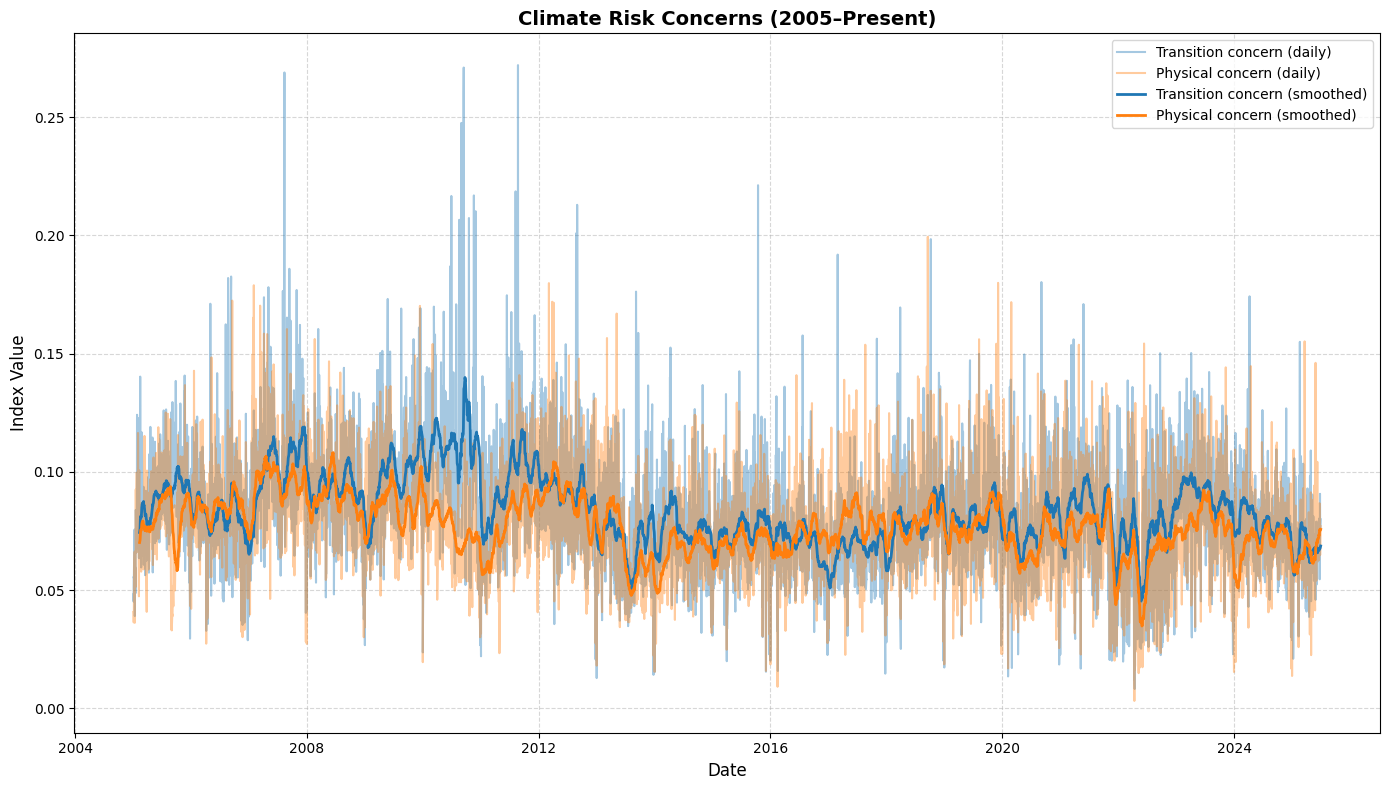

In [ ]:
plot_PRI_TRI(climate_df)

## Climate Policy Uncertainty Index (CPU)

In [ ]:
def get_CPU_data():
    # Downloading the dataset
    url = "https://www.policyuncertainty.com/media/CPU%20index.csv"

    # Header is on the 5th line (0-based index -> header=4)
    df = pd.read_csv(url, header=4, encoding="cp1252")

    # Normalize column names
    df.columns = [c.strip().lower() for c in df.columns]

    # Parse dates like "Apr-87" -> monthly timestamps (use month end for nicer plots)
    df["date"] = pd.to_datetime(df["date"], format="%b-%y", errors="coerce")
    df = df.dropna(subset=["date"]).sort_values("date")
    df["date"] = df["date"].dt.to_period("M").dt.to_timestamp("M")

    # Use the global CPU index column from this file
    cpu = df[["date", "cpu_index"]].rename(columns={"cpu_index": "Global_CPU_Index"}).set_index("date")
    return cpu

Start date: 1987-04-30
End date: 2025-06-30


,Global_CPU_Index
date,
1987-04-30,43.589069
1987-05-31,41.862022
1987-06-30,71.135203
1987-07-31,53.756704
1987-08-31,60.615545


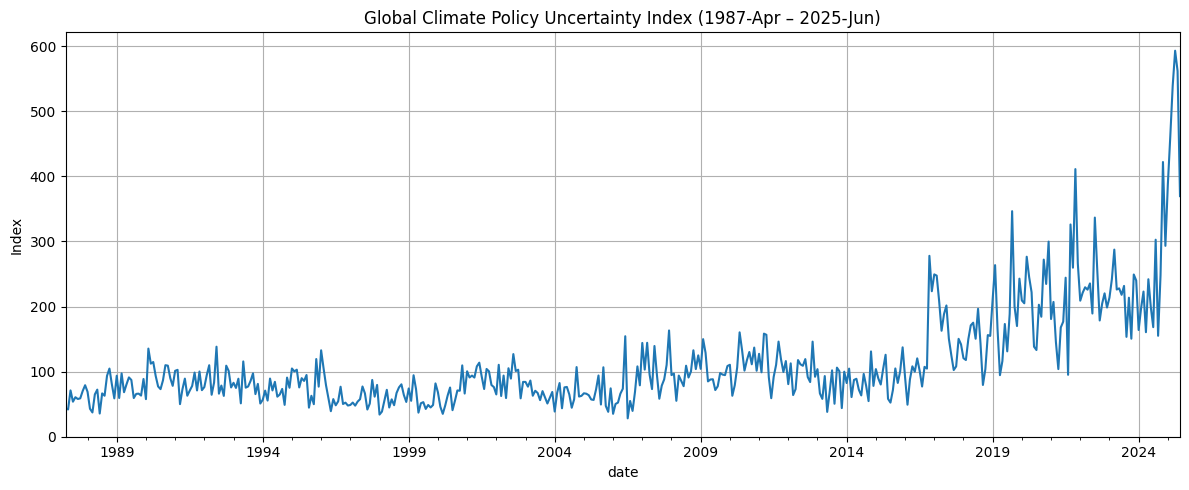

In [ ]:
cpu = get_CPU_data()

# Just print the period of the dataset
date_from = cpu.first_valid_index()
date_to = cpu.last_valid_index()
print("Start date:", date_from.date())
print("End date:", date_to.date())

# Quick peek
display(cpu.head())

# Plot the dataset
ax = cpu.plot(
    title=f"Global Climate Policy Uncertainty Index ({date_from:%Y-%b} – {date_to:%Y-%b})",
    figsize=(12, 5),
    legend=False,
)
ax.set_ylabel("Index")
ax.grid(True)
plt.tight_layout()
plt.show()

## Interpolating to daily frequency

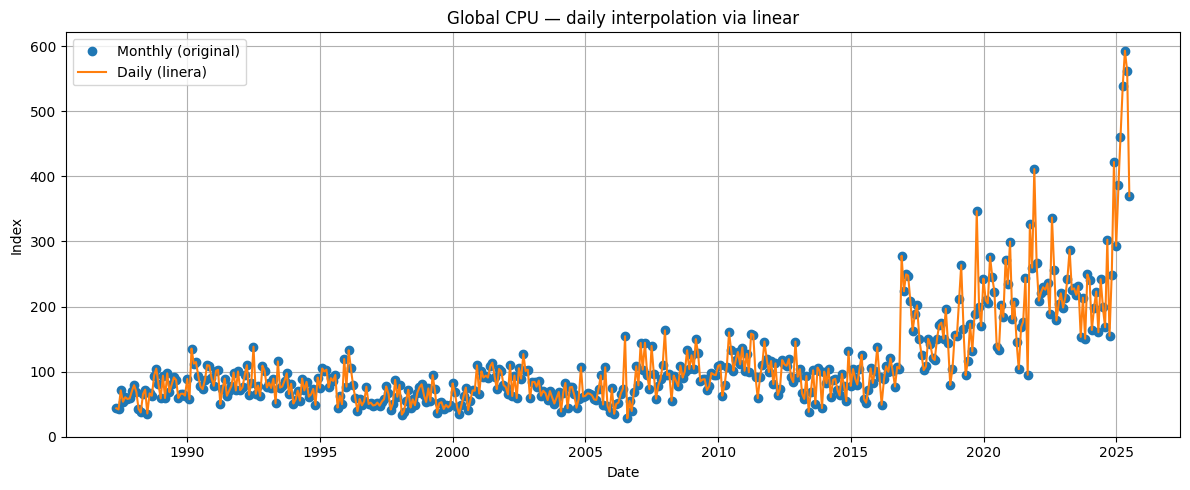

In [ ]:
# Downloading again - not necessary - just to make sure we have the original data
cpu = get_CPU_data()


# ---- 1) work on a copy so the original `cpu` is untouched ----
cpu_daily = cpu.copy(deep=True)

# identify the value column
value_col = cpu_daily.columns[0]

# ---- 2) upsample to daily and 3) interpolate by time ----
daily_idx = pd.date_range(cpu_daily.index.min(), cpu_daily.index.max(), freq="D")
cpu_daily = cpu_daily.reindex(daily_idx)
cpu_daily[value_col] = cpu_daily[value_col].interpolate(method="time")

cpu_daily_linear = cpu_daily.copy(deep=True)


# ---- 5) plot monthly points vs daily curve ----
plt.figure(figsize=(12, 5))
plt.plot(cpu.index, cpu[value_col], "o", label="Monthly (original)")
plt.plot(cpu_daily.index, cpu_daily[value_col], "-", label="Daily (linera)")
plt.title("Global CPU — daily interpolation via linear")
plt.xlabel("Date"); plt.ylabel("Index"); plt.grid(True); plt.legend()
plt.tight_layout(); plt.show()



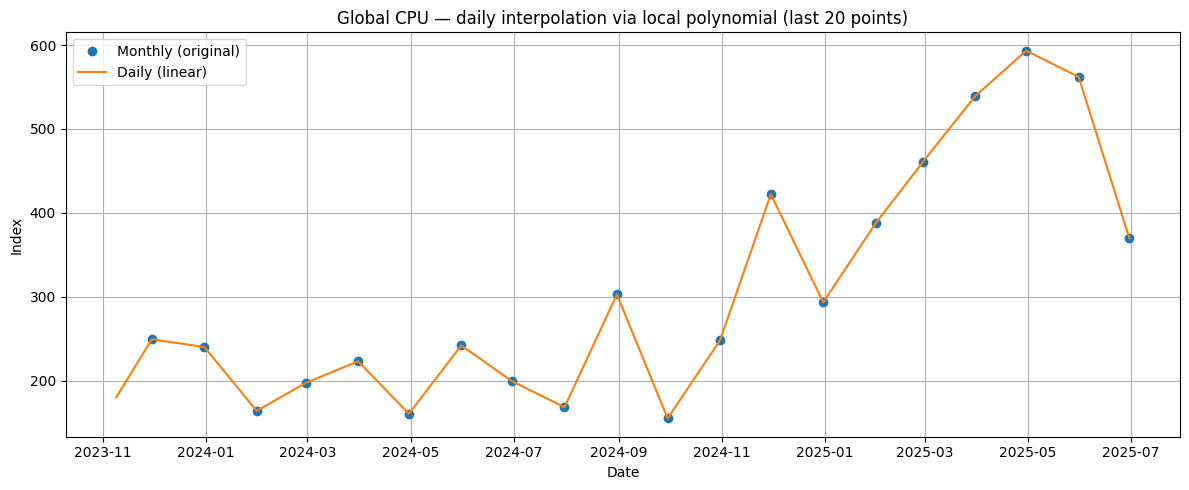

In [ ]:
# ---- 5) plot monthly points vs daily curve (last 20 points only) ----
plt.figure(figsize=(12, 5))

# Slice the last 20 points from each dataframe
plt.plot(cpu.index[-20:], cpu[value_col].iloc[-20:], "o", label="Monthly (original)")
plt.plot(cpu_daily_linear.index[-600:], cpu_daily_linear[value_col].iloc[-600:], "-", label="Daily (linear)")

plt.title("Global CPU — daily interpolation via local polynomial (last 20 points)")
plt.xlabel("Date")
plt.ylabel("Index")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# -------------------------------------------------------------------
# 1. Helper function: upsample + interpolate using chosen method
# -------------------------------------------------------------------

def interpolate_daily(input_df: pd.DataFrame, method: str = "time", order: int | None = None) -> pd.DataFrame:
    """
    Upsample monthly data to daily frequency and interpolate missing values
    using a specified pandas method.

    Parameters
    ----------
    input_df : pd.DataFrame
        Original monthly dataframe with a DatetimeIndex.
    method : str
        Interpolation method ('time', 'linear', 'spline', 'polynomial', etc.).
    order : int or None
        Required for spline/polynomial methods (e.g., order=3 for cubic).

    Returns
    -------
    pd.DataFrame
        Interpolated daily dataframe with one column named f"{colname}_{method}".
    """
    # Copy to avoid mutating the original
    df = input_df.copy(deep=True)

    # Identify value column
    value_col = df.columns[0]

    # Build daily date range covering the full monthly span
    daily_idx = pd.date_range(df.index.min(), df.index.max(), freq="D")

    # Reindex (introduce NaNs for missing days)
    df = df.reindex(daily_idx)

    # Choose interpolation method
    if order is not None and method in ["spline", "polynomial"]:
        df[value_col] = df[value_col].interpolate(method=method, order=order)
    else:
        df[value_col] = df[value_col].interpolate(method=method)

    # Rename column to include method name
    df.rename(columns={value_col: f"{value_col}_{method}"}, inplace=True)
    return df


In [ ]:
# -------------------------------------------------------------------
# Run interpolation for multiple methods
# -------------------------------------------------------------------

cpu = get_CPU_data()  # fetch the monthly Global CPU data
value_col = cpu.columns[0]

# Define interpolation configurations
methods = {
    "time": {"method": "time"},
    "spline3": {"method": "spline", "order": 3},
    "poly3": {"method": "polynomial", "order": 2},
    "linear": {"method": "linear"},
}

# Run all interpolations and store results
daily_interpolations = {}
for name, params in methods.items():
    daily_interpolations[name] = interpolate_daily(cpu, **params)

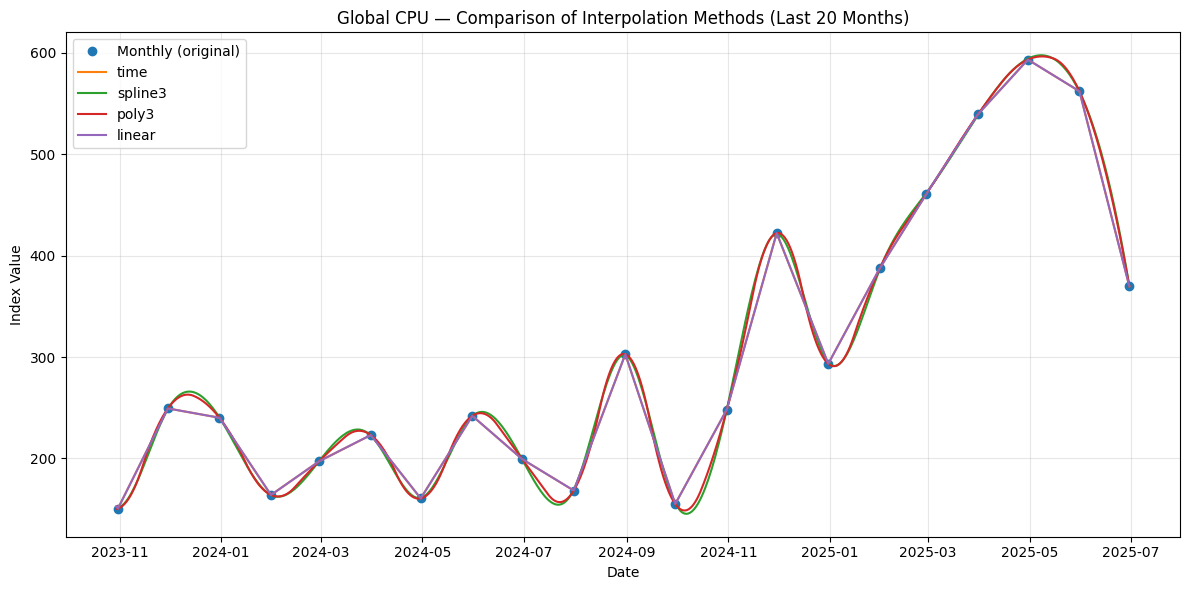

In [ ]:
# -------------------------------------------------------------------
# Plot all results on a single chart (last 20 months only)
# -------------------------------------------------------------------

plt.figure(figsize=(12, 6))

# Determine the cutoff date for the last 20 months
cutoff_date = cpu.index.max() - pd.DateOffset(months=20)

# Filter the monthly data
cpu_recent = cpu[cpu.index >= cutoff_date]

# Plot last 20 monthly points
plt.plot(cpu_recent.index, cpu_recent[value_col], "o", label="Monthly (original)", markersize=6)

# Plot each interpolated curve (filtered to same time window)
for name, df_interp in daily_interpolations.items():
    df_recent = df_interp[df_interp.index >= cutoff_date]
    plt.plot(df_recent.index, df_recent.iloc[:, 0], label=f"{name}")

# Titles and labels
plt.title("Global CPU — Comparison of Interpolation Methods (Last 20 Months)")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


### Interpolate to daily data - Multiple methods compared

In [ ]:

# ------------------ Helper utilities ------------------

def _prep_xy(input_df: pd.DataFrame):
    """Prepare numeric x, y arrays from a monthly time-indexed DataFrame."""
    df = input_df.copy(deep=True)
    s = df.dropna().sort_index().iloc[:, 0]
    x0 = s.index[0]
    x = (s.index - x0) / np.timedelta64(1, "D")  # days since first observation
    y = s.values.astype(float)
    name = s.name or "value"
    return x0, x.to_numpy(dtype=float), y, name

def _daily_axis(input_df: pd.DataFrame):
    """Generate a daily DatetimeIndex spanning the data range."""
    return pd.date_range(input_df.index.min(), input_df.index.max(), freq="D")

def _wrap(idx: pd.DatetimeIndex, name: str, yhat: np.ndarray):
    """Return interpolated/smoothed output as a clean DataFrame."""
    out = pd.DataFrame({name: np.asarray(yhat, dtype=float)}, index=idx)
    out.index.name = "date"
    return out


In [ ]:
# ------------------ Interpolation / smoothing methods ------------------

def interp_pchip(input_df: pd.DataFrame) -> pd.DataFrame:
    """Shape-preserving Piecewise Cubic Hermite interpolation."""
    df = input_df.copy(deep=True)
    x0, x, y, name = _prep_xy(df)
    f = PchipInterpolator(x, y)
    xd = (_daily_axis(df) - x0) / np.timedelta64(1, "D")
    return _wrap(_daily_axis(df), f"{name}_pchip", f(xd))

def interp_akima(input_df: pd.DataFrame) -> pd.DataFrame:
    """Akima interpolation — local cubic with reduced oscillation."""
    df = input_df.copy(deep=True)
    x0, x, y, name = _prep_xy(df)
    f = Akima1DInterpolator(x, y)
    xd = (_daily_axis(df) - x0) / np.timedelta64(1, "D")
    return _wrap(_daily_axis(df), f"{name}_akima", f(xd))

def interp_uspline(input_df: pd.DataFrame, k: int = 3, s: float | None = 10.0) -> pd.DataFrame:
    """Univariate smoothing spline (s>0 → smoother curve)."""
    df = input_df.copy(deep=True)
    x0, x, y, name = _prep_xy(df)
    f = UnivariateSpline(x, y, k=k, s=s)
    xd = (_daily_axis(df) - x0) / np.timedelta64(1, "D")
    suffix = f"us{k}_s{0 if s is None else s}"
    return _wrap(_daily_axis(df), f"{name}_{suffix}", f(xd))

def smooth_lowess(input_df: pd.DataFrame, frac: float = 0.15, it: int = 1) -> pd.DataFrame:
    """LOWESS (locally weighted regression) smoother."""
    df = input_df.copy(deep=True)
    value_col = df.columns[0]
    daily_idx = _daily_axis(df)
    s = df[value_col].reindex(daily_idx).interpolate(method="time")
    x = (s.index - s.index[0]) / np.timedelta64(1, "D")
    y = s.values
    yhat = lowess(y, x, frac=frac, it=it, return_sorted=False)
    return _wrap(daily_idx, f"{value_col}_lowess{frac}", yhat)

def smooth_savgol(
    input_df: pd.DataFrame,
    months_window: float = 3.0,   # ↓ narrower window
    polyorder: int = 2            # ↓ quadratic often behaves better
) -> pd.DataFrame:
    """Savitzky–Golay local polynomial smoother (moving-window)."""
    df = input_df.copy(deep=True)
    value_col = df.columns[0]

    # Build daily grid and fill linearly (time) first
    idx = pd.date_range(df.index.min(), df.index.max(), freq="D")
    s = df[value_col].reindex(idx).interpolate(method="time")

    # Convert "months window" to an odd integer # of days
    window = int(round(months_window * 30.44))
    if window % 2 == 0:
        window += 1
    window = max(polyorder + 2 + (1 - (polyorder + 2) % 2),
                 min(window, len(s) - (1 - len(s) % 2)))

    yhat = savgol_filter(s.to_numpy(), window_length=window, polyorder=polyorder, mode="nearest")
    return pd.DataFrame({f"{value_col}_savgol{months_window}m_p{polyorder}": yhat}, index=idx)


In [ ]:
cpu = get_CPU_data()  # your monthly time series DataFrame

input_df = cpu.copy(deep=True)

pandas_methods = {
#    "Time (linear-in-time)": {"method": "time"},
    "Linear":                 {"method": "linear"},
    "Spline (k=3)":           {"method": "spline", "order": 3},
    "Polynomial (deg=7)":     {"method": "polynomial", "order": 7},
}

results = {label: interpolate_daily(input_df, **cfg) for label, cfg in pandas_methods.items()}

## Generate daily versions using different interpolation/smoothing methods
daily_pchip  = interp_pchip(input_df)
daily_akima  = interp_akima(input_df)
daily_us10   = interp_uspline(input_df, k=3, s=10.0)      # smoothing spline
daily_lowess = smooth_lowess(input_df, frac=0.12)         # local regression
daily_sg     = smooth_savgol(input_df, months_window=7, polyorder=3)  # local polynomial filter

results.update({
    "PCHIP": daily_pchip,
#    "Akima": daily_akima,
#    "UnivariateSpline (s=10)": daily_us10,
#    "LOWESS (frac=0.12)": daily_lowess,
    "Savitzky-Golay": daily_sg
})


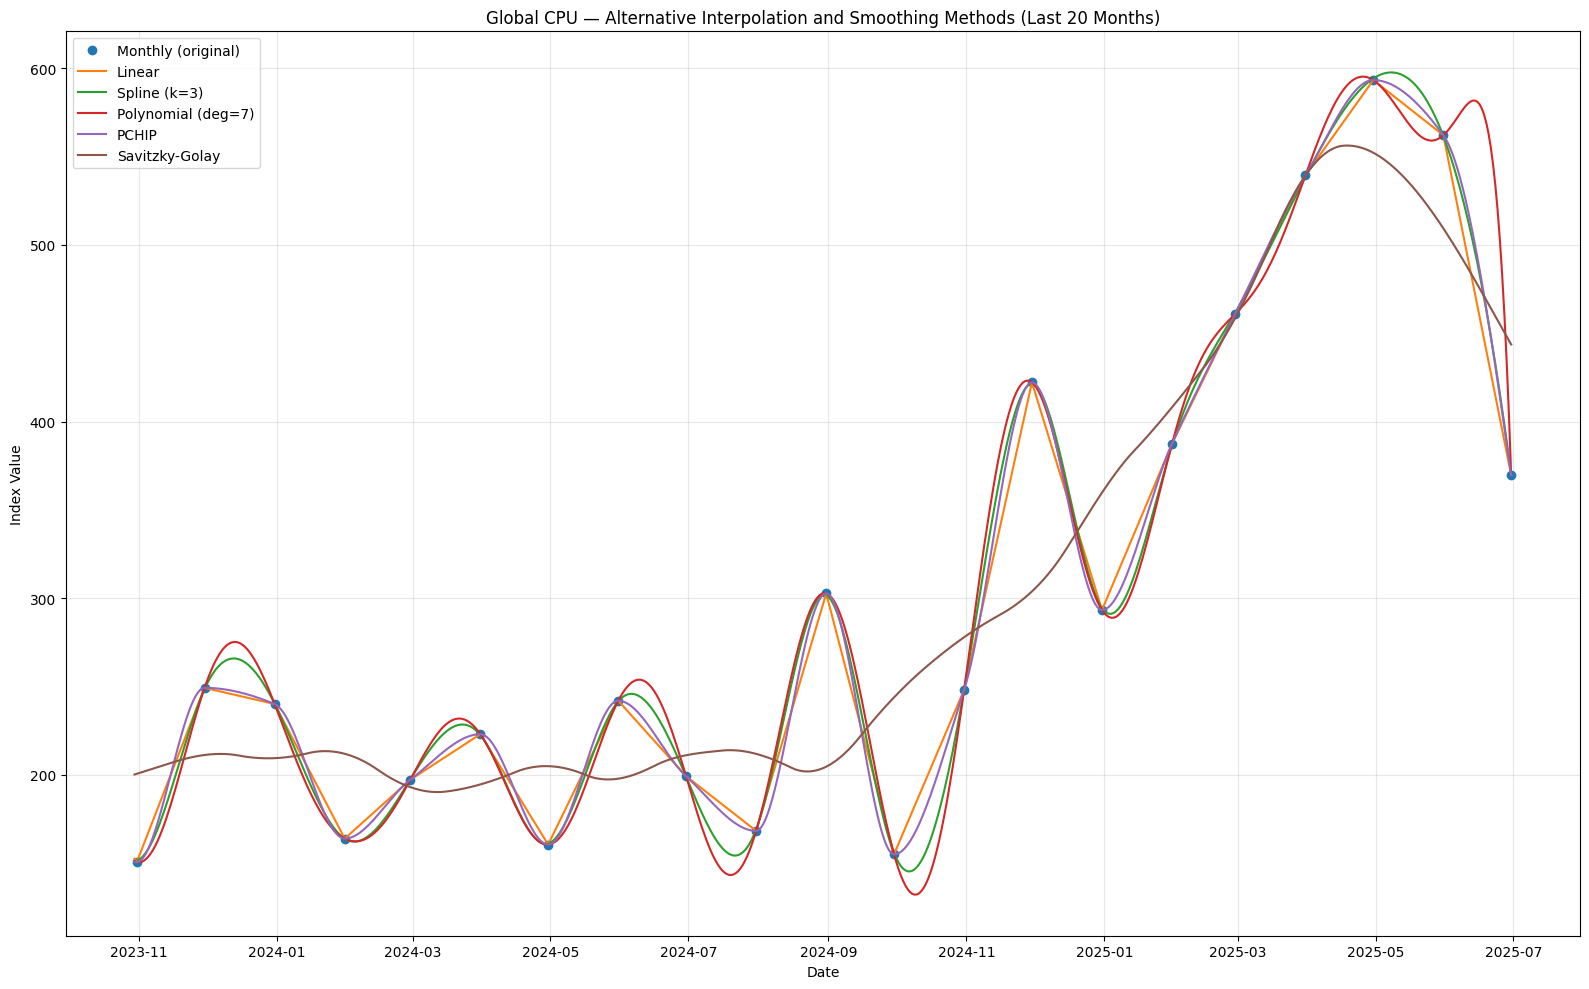

In [ ]:
# Determine the last couple of months of data
number_of_months = 20
cutoff_date = input_df.index.max() - pd.DateOffset(months=number_of_months)

plt.figure(figsize=(16, 10))

# Plot original monthly points
value_col = input_df.columns[0]
input_recent = input_df[input_df.index >= cutoff_date]
plt.plot(input_recent.index, input_recent[value_col], "o", label="Monthly (original)", markersize=6)

# Plot interpolated/smoothed curves
for label, df in results.items():
    df_recent = df[df.index >= cutoff_date]
    plt.plot(df_recent.index, df_recent.iloc[:, 0], label=label)

# Formatting
plt.title(f"Global CPU — Alternative Interpolation and Smoothing Methods (Last {number_of_months} Months)")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Other related datasets

### **Get geopolitcal data (GPR, EUI)**

Start date: 1985-01-01 00:00:00
End date: 2025-06-01 00:00:00


,GPR
month,
1985-01-01,102.173378
1985-02-01,117.102020
1985-03-01,124.778152
1985-04-01,87.929001
1985-05-01,103.262848


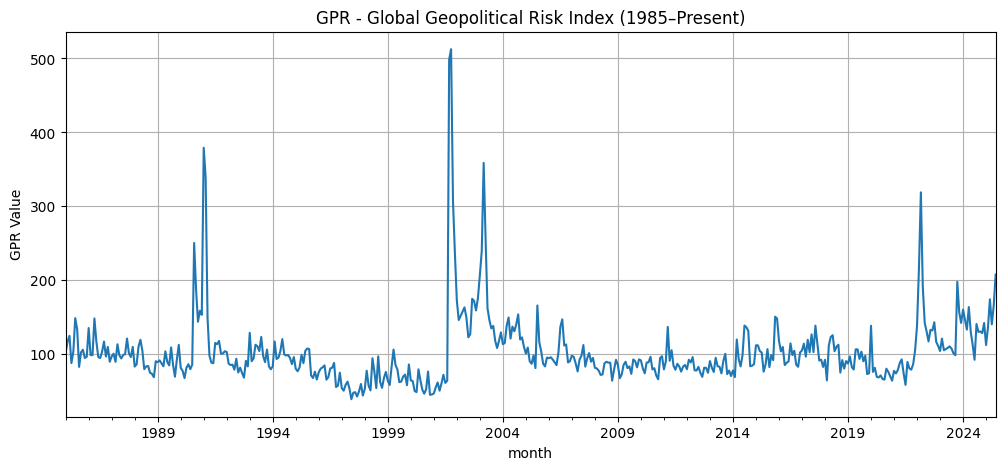

In [ ]:
# getting Geopolitical Risk Index - GPR (1985 - 2025)

# downloading the dataset
url = "https://www.matteoiacoviello.com/gpr_files/data_gpr_export.xls"
df = pd.read_excel(url) # top row is month and GPR
df['month'] = pd.to_datetime(df['month'], format='%d/%m/%Y')
df.set_index('month', inplace=True)
gpr = df[['GPR']]
gpr = gpr[gpr.index >= '1985-01-01']

date_from = gpr.first_valid_index()
date_to = gpr.last_valid_index()
print("Start date:", date_from)
print("End date:", date_to)
display(gpr.head())

# plotting the GPR series
gpr.plot(title='GPR - Global Geopolitical Risk Index (1985–Present)', figsize=(12, 5), legend=False)
plt.ylabel('GPR Value')
plt.grid(True)
plt.show()

Start date: 1996-01-01
End date: 2023-11-01


,Energy_Uncertainty_Index
Date,
1996-01-01,0.358232
1996-02-01,0.373172
1996-03-01,0.203098
1996-04-01,0.317945
1996-05-01,0.711228


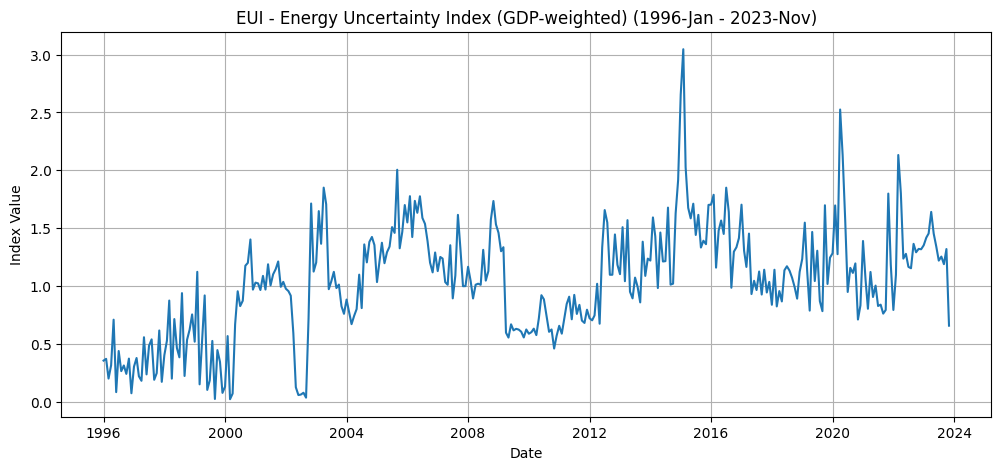

In [ ]:
# getting Energy Uncertainty Risk Index - EUI (1996-2023 monthly data)


# downloading the dataset (excel)
url = "https://www.policyuncertainty.com/media/Energy-Related%20Uncertainty%20Indexes.xlsx"
sheet_name = "Global Average EUI Indexes"

df = pd.read_excel(url, sheet_name=sheet_name, header=2, converters={'Date': str})
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%d-%m %H:%M:%S', errors='coerce')
df['Date'] = df['Date'].dt.date
df.set_index('Date', inplace=True)

# extracting the energy index
energy_index = df[['global_EUI_GDP_weighted']]
energy_index.rename(columns={'global_EUI_GDP_weighted': 'Energy_Uncertainty_Index'}, inplace=True)

# perid of the downloaded dataset
date_from = energy_index.first_valid_index()
date_to = energy_index.last_valid_index()
print("Start date:", date_from)
print("End date:", date_to)
display(energy_index.head())

# plotting the EUI series
energy_index.plot(title=f"EUI - Energy Uncertainty Index (GDP-weighted) ({date_from.strftime('%Y-%b')} - {date_to.strftime('%Y-%b')})", figsize=(12, 5), legend=False)
plt.ylabel('Index Value')
plt.grid(True)
plt.show()

### **Get FRED data (CPI, GDP)**

CPI (Consumer Price Index)


,US CPI
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95


GDP (Gross Domestic Product)


,US GDP Growth Rate
1947-04-01,-1.0
1947-07-01,-0.8
1947-10-01,6.4
1948-01-01,6.2
1948-04-01,6.8


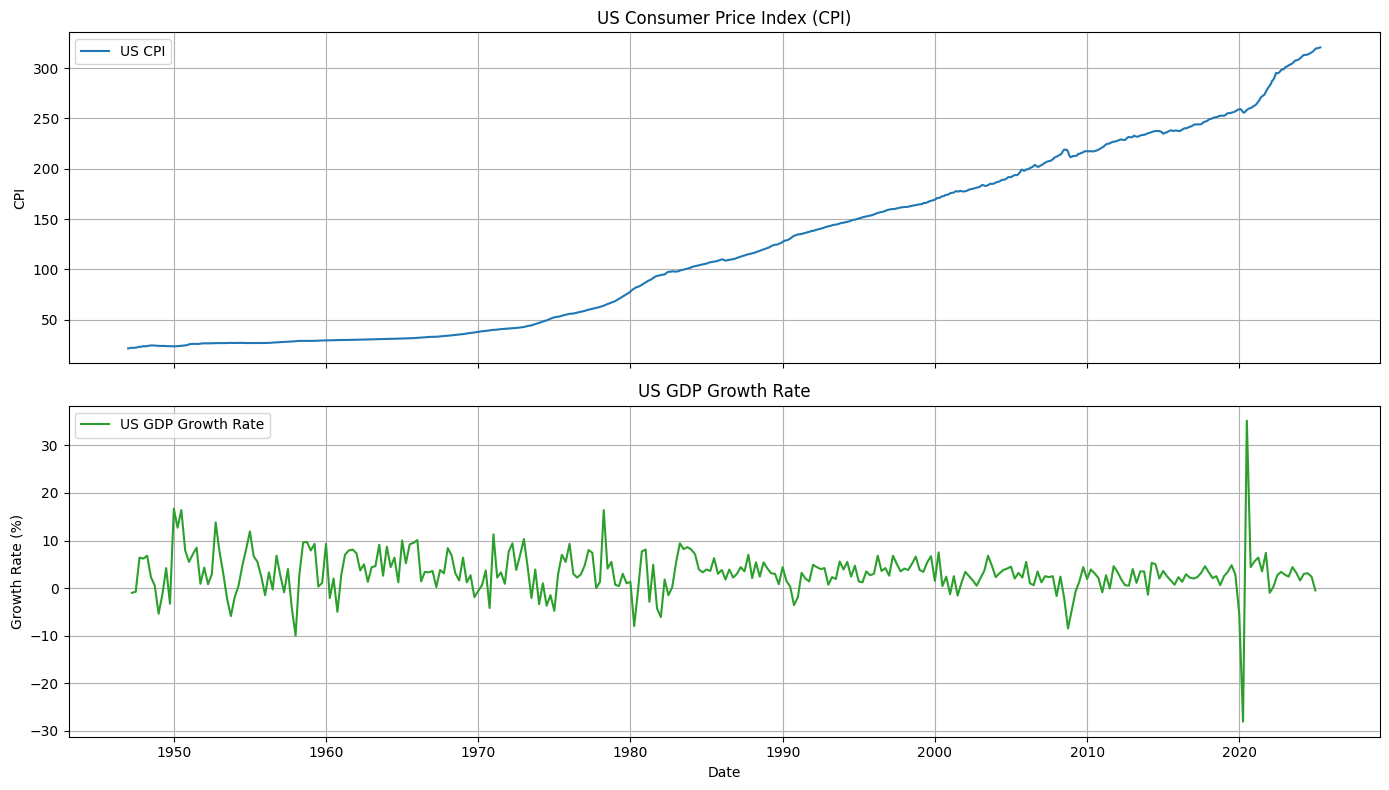

In [ ]:
FRED_API_KEY = '1eca31140fb3700173f5c8b43fecbf97'
fred = Fred(api_key=FRED_API_KEY)

# retrieving US CPI (Consumer Price Index) and US GDP (Gross Domestic Product) data
cpi = fred.get_series('CPIAUCSL')
gdp = fred.get_series('A191RL1Q225SBEA')
cpi.name = 'US CPI'
gdp.name = 'US GDP Growth Rate'

print("CPI (Consumer Price Index)")
display(cpi.head())

print("GDP (Gross Domestic Product)")
display(gdp.head())

# plotting US CPI and GDP series
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

ax1.plot(cpi, label=cpi.name, color='tab:blue')
ax1.set_title('US Consumer Price Index (CPI)')
ax1.set_ylabel('CPI')
ax1.grid(True)
ax1.legend()

ax2.plot(gdp, label=gdp.name, color='tab:green')
ax2.set_title('US GDP Growth Rate')
ax2.set_xlabel('Date')
ax2.set_ylabel('Growth Rate (%)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

### **Get VIX index**

,VIX_Close
Date,
1996-01-02,12.19
1996-01-03,12.10
1996-01-04,13.78
1996-01-05,13.58
1996-01-08,13.11


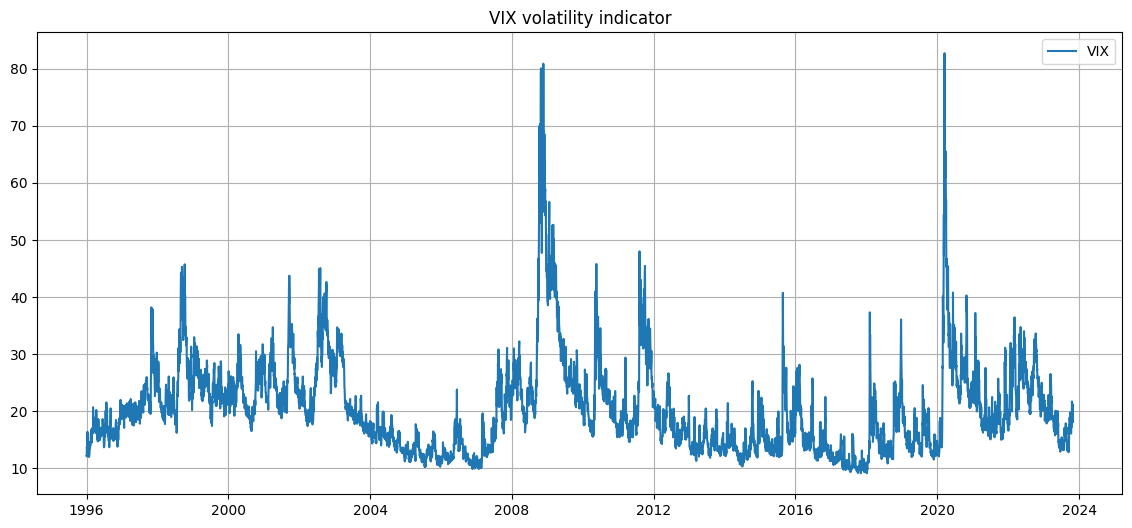

In [ ]:
# downloading VIX index from Yahoo finance
vix = yf.download('^VIX', start='1996-01-01', end='2023-11-01', progress=False, auto_adjust = True)
vix = vix[('Close', '^VIX')].rename('VIX_Close').to_frame()
display(vix.head())

# plotting the VIX series
plt.figure(figsize=(14, 6))
plt.title('VIX volatility indicator')
plt.plot(vix['VIX_Close'], label='VIX')
plt.legend()
plt.grid(True)
plt.show()

### **Get US Dollar Index (DXY)**

,DXY_Close
Date,
1996-01-01,84.760002
1996-01-02,84.690002
1996-01-03,85.110001
1996-01-04,85.220001
1996-01-05,85.059998


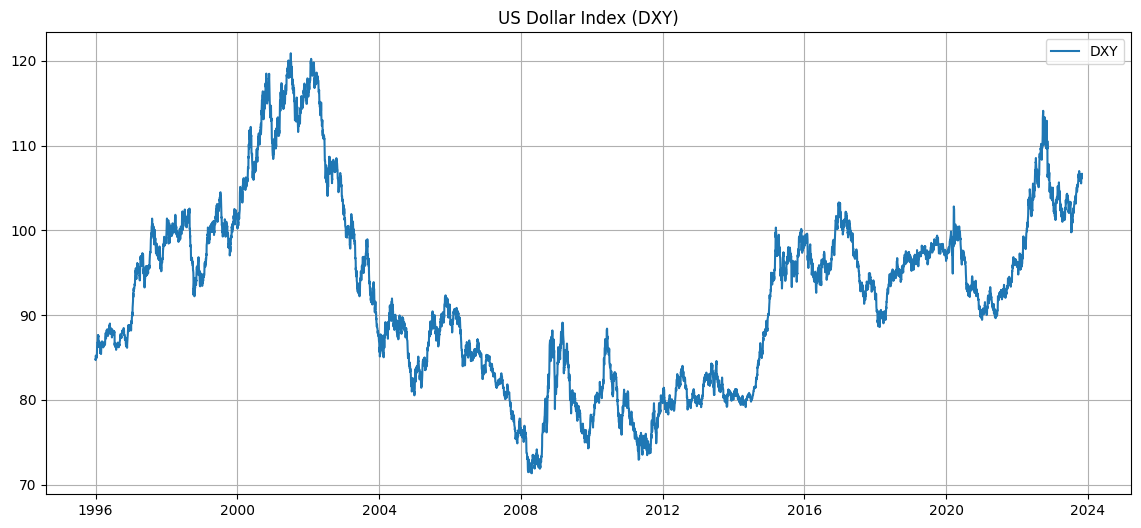

In [ ]:
# downloading DXY (US Dollar Index) from Yahoo finance
dxy = yf.download('DX-Y.NYB', start='1996-01-01', end='2023-11-01', progress=False, auto_adjust=True)
dxy = dxy[('Close', 'DX-Y.NYB')].rename('DXY_Close').to_frame()
display(dxy.head())

# plotting the DXY series
plt.figure(figsize=(14, 6))
plt.title('US Dollar Index (DXY)')
plt.plot(dxy['DXY_Close'], label='DXY')
plt.legend()
plt.grid(True)
plt.show()


Refinery Utilization Rate (FRED)
Start date: 1991-07-01 00:00:00
End date: 2025-05-01 00:00:00


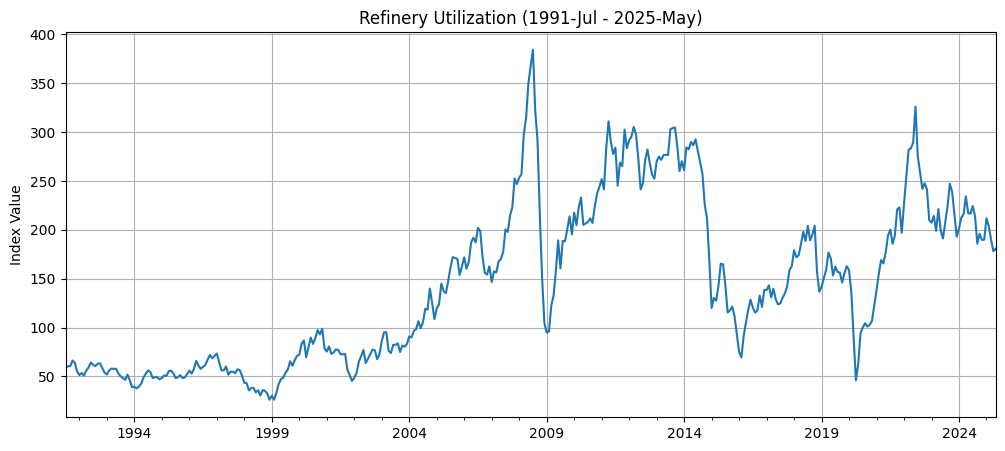

In [ ]:
FRED_API_KEY = '1eca31140fb3700173f5c8b43fecbf97'
fred = Fred(api_key=FRED_API_KEY)

rur = fred.get_series('WPU056101')
rur.name = 'Refinery Utilization rate'
print("Refinery Utilization Rate (FRED)")

# perid of the downloaded dataset
date_from = rur.first_valid_index()
date_to = rur.last_valid_index()
print("Start date:", date_from)
print("End date:", date_to)

# plotting the RUR series
rur.plot(title=f"Refinery Utilization ({date_from.strftime('%Y-%b')} - {date_to.strftime('%Y-%b')})", figsize=(12, 5), legend=False)
plt.ylabel('Index Value')
plt.grid(True)
plt.show()